In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

from load_data import load_data

## Load datasets

In [2]:
load = False

if load:
    df_total, df_daily_cases = load_data()
else:
    df_total = pd.read_csv("data/total_cases.csv", index_col=0, header=0)
    df_daily_cases = pd.read_csv("data/daily_cases.csv", index_col=0, header=0)

## EDA

### Analysing dataset of total cases

In [3]:
df_total.head()

,country_code,country,total_confirmed,total_deaths,total_recovered,last_updated
0,UA,Ukraine,10861,272,1413,2020-05-01T00:00:07.000Z
1,UA,Ukraine,11411,279,1498,2020-05-02T00:00:07.000Z
2,UA,Ukraine,11913,288,1548,2020-05-03T00:00:08.000Z
3,UA,Ukraine,12331,303,1619,2020-05-04T23:59:01.000Z
4,UA,Ukraine,12697,316,1875,2020-05-05T00:00:09.000Z


In [4]:
features = ["total_confirmed", "total_deaths", "total_recovered"]

In [5]:
df_total['datetime'] = pd.to_datetime(df_total.last_updated)
df_total['year'] = pd.DatetimeIndex(df_total.datetime).year
df_total['month'] = pd.DatetimeIndex(df_total.datetime).month
df_total['day'] = pd.DatetimeIndex(df_total.datetime).day
df_total.drop('last_updated', axis=1, inplace=True)

df_total.head()

,country_code,country,total_confirmed,total_deaths,total_recovered,datetime,year,month,day
0,UA,Ukraine,10861,272,1413,2020-05-01 00:00:07+00:00,2020,5,1
1,UA,Ukraine,11411,279,1498,2020-05-02 00:00:07+00:00,2020,5,2
2,UA,Ukraine,11913,288,1548,2020-05-03 00:00:08+00:00,2020,5,3
3,UA,Ukraine,12331,303,1619,2020-05-04 23:59:01+00:00,2020,5,4
4,UA,Ukraine,12697,316,1875,2020-05-05 00:00:09+00:00,2020,5,5


In [6]:
df_total.describe()

,total_confirmed,total_deaths,total_recovered,year,month,day
count,184.000000,184.000000,184.000000,184.0,184.000000,184.000000
mean,109308.929348,2296.614130,48909.097826,2020.0,7.500000,15.836957
std,97995.486579,1759.071109,41401.482584,0.0,1.714611,8.878386
min,10861.000000,272.000000,1413.000000,2020.0,5.000000,1.000000
25%,32309.500000,909.250000,14459.250000,2020.0,6.000000,8.000000
50%,70470.000000,1701.000000,39030.000000,2020.0,7.500000,16.000000
75%,160441.500000,3283.000000,71188.500000,2020.0,9.000000,23.250000
max,387481.000000,7196.000000,158928.000000,2020.0,10.000000,31.000000


<Figure size 1440x1080 with 0 Axes>

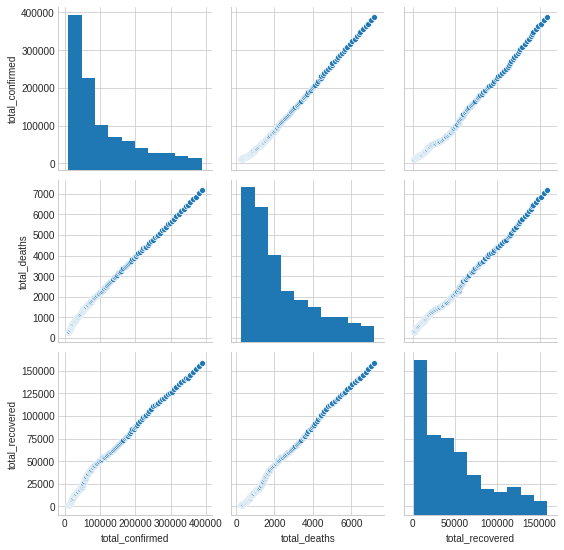

In [7]:
plt.figure(figsize=(20, 15))
sns.pairplot(df_total[features])
plt.show()

<Figure size 1440x1080 with 0 Axes>

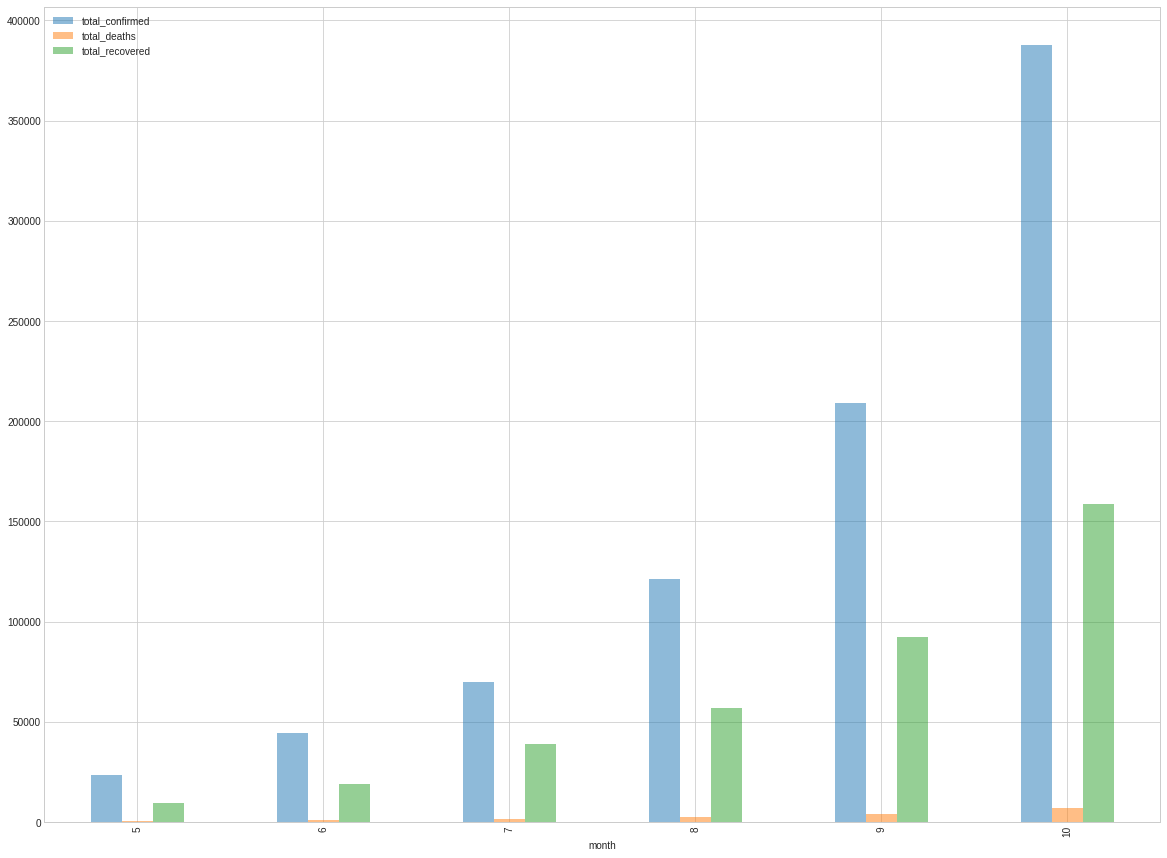

In [8]:
plt.figure(figsize=(20, 15))
df_total[features + ['month']].groupby('month').max().plot(kind='bar', alpha=0.5, figsize=(20, 15))
plt.show()

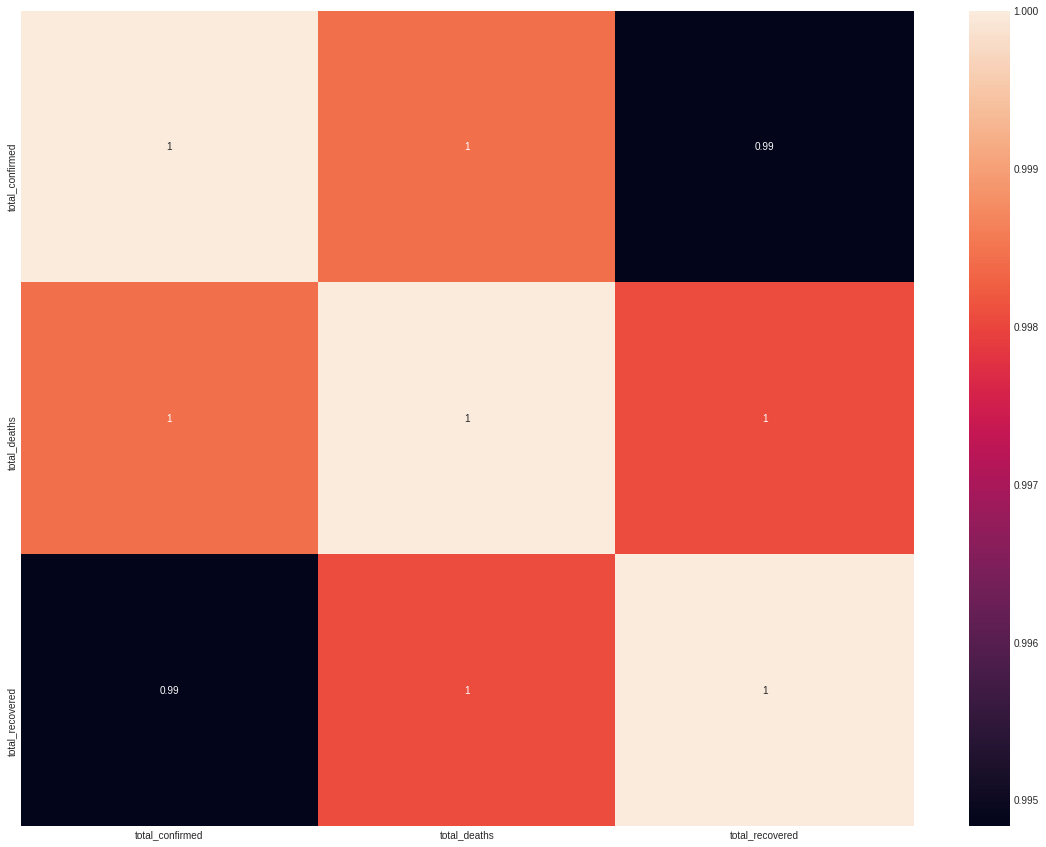

In [9]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_total[features].corr(), annot=True)
plt.show()

### Analysing dataset of daily cases

In [10]:
df_daily_cases.head()

,country,last_updated,new_infections,new_deaths,new_recovered
0,Ukraine,2020-05-01T00:00:00.000Z,540,11,0
1,Ukraine,2020-05-02T00:00:00.000Z,550,11,85
2,Ukraine,2020-05-03T00:00:00.000Z,550,9,50
3,Ukraine,2020-05-04T00:00:00.000Z,418,15,71
4,Ukraine,2020-05-05T00:00:00.000Z,418,15,256


In [11]:
features = ["new_infections", "new_deaths", "new_recovered"]

In [12]:
df_daily_cases['datetime'] = pd.to_datetime(df_daily_cases.last_updated)
df_daily_cases['year'] = pd.DatetimeIndex(df_daily_cases.datetime).year
df_daily_cases['month'] = pd.DatetimeIndex(df_daily_cases.datetime).month
df_daily_cases['day'] = pd.DatetimeIndex(df_daily_cases.datetime).day
df_daily_cases.drop('last_updated', axis=1, inplace=True)

df_daily_cases.head()

,country,new_infections,new_deaths,new_recovered,datetime,year,month,day
0,Ukraine,540,11,0,2020-05-01 00:00:00+00:00,2020,5,1
1,Ukraine,550,11,85,2020-05-02 00:00:00+00:00,2020,5,2
2,Ukraine,550,9,50,2020-05-03 00:00:00+00:00,2020,5,3
3,Ukraine,418,15,71,2020-05-04 00:00:00+00:00,2020,5,4
4,Ukraine,418,15,256,2020-05-05 00:00:00+00:00,2020,5,5


In [13]:
df_daily_cases.describe()

,new_infections,new_deaths,new_recovered,year,month,day
count,184.000000,184.000000,184.000000,184.0,184.000000,184.000000
mean,2135.641304,42.331522,861.875000,2020.0,7.500000,15.836957
std,2018.082816,36.946482,794.801883,0.0,1.714611,8.878386
min,325.000000,8.000000,0.000000,2020.0,5.000000,1.000000
25%,676.750000,17.000000,341.750000,2020.0,6.000000,8.000000
50%,1135.000000,25.000000,591.000000,2020.0,7.500000,16.000000
75%,3000.250000,56.250000,1035.500000,2020.0,9.000000,23.250000
max,8752.000000,173.000000,3902.000000,2020.0,10.000000,31.000000


<Figure size 1440x1080 with 0 Axes>

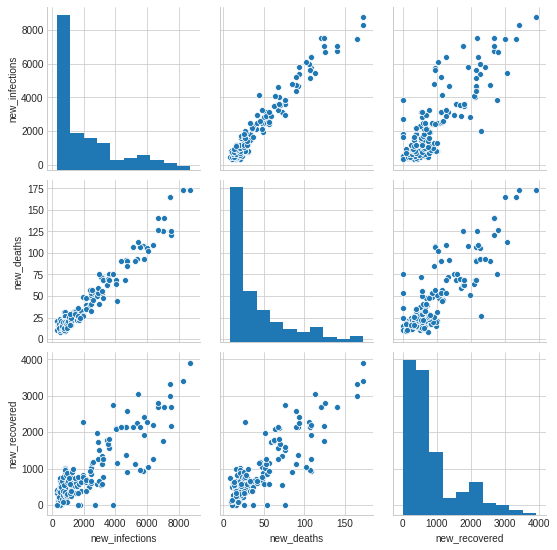

In [14]:
plt.figure(figsize=(20, 15))
sns.pairplot(df_daily_cases[features])
plt.show()

<Figure size 1440x1080 with 0 Axes>

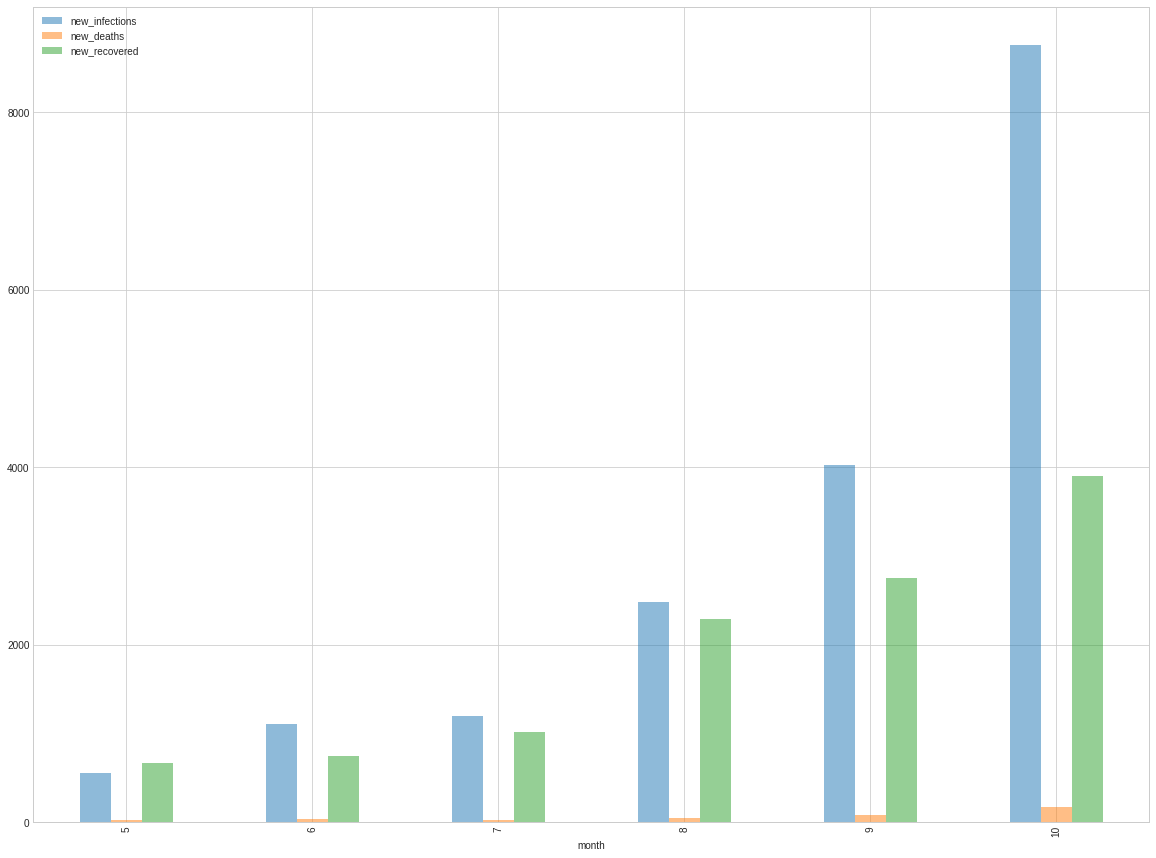

In [15]:
plt.figure(figsize=(20, 15))
df_daily_cases[features + ['month']].groupby('month').max().plot(kind='bar', alpha=0.5, figsize=(20, 15))
plt.show()

<Figure size 1440x1080 with 0 Axes>

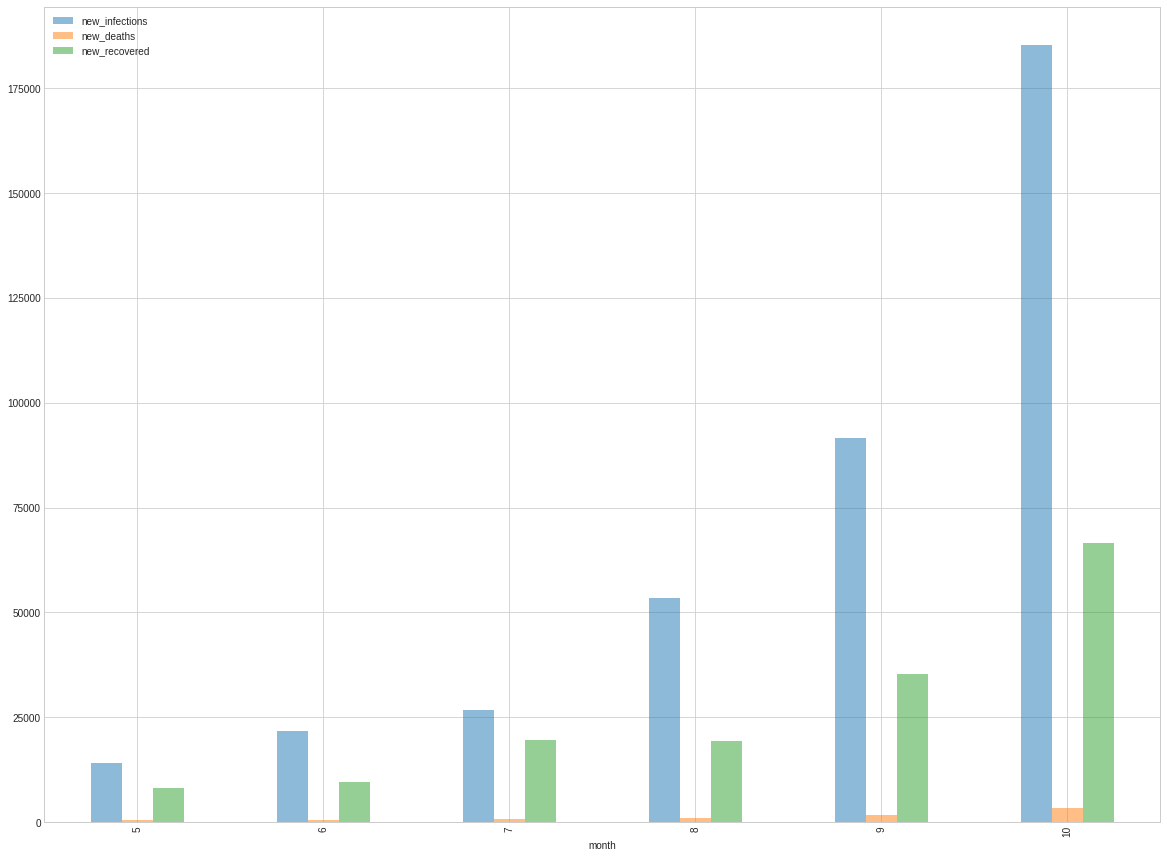

In [16]:
plt.figure(figsize=(20, 15))
df_daily_cases[features + ['month']].groupby('month').sum().plot(kind='bar', alpha=0.5, figsize=(20, 15))
plt.show()

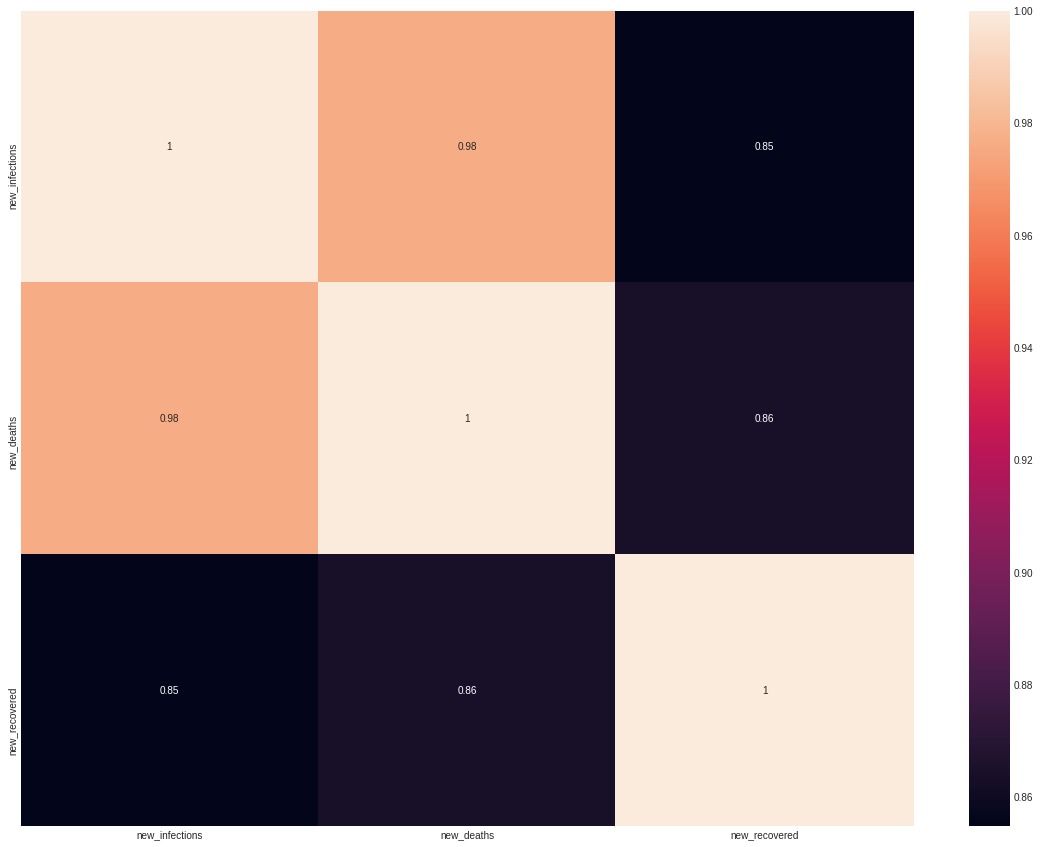

In [17]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_daily_cases[features].corr(), annot=True)
plt.show()

## Data split and normalization

In [18]:
# import some useful packages:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Activation

from tensorflow import keras
from sklearn.model_selection import train_test_split

### Data conversion for the training of language model

For each example/sequence and each possible starting day in this example/sequence, we create two sequences
- an input sequence: 
  - which contains a sub-sequence of length ```sequence_length```;  this sub-sequence range from the day $t$ to the day $t+sequence\_length-1$;
- an output sequence:
  - which contains the following day to be predicted, the one at position $t+sequence\_length$.

The training is therefore performed by giving to the model a set of sequences as input and asking the network to predict each time the cases of the day that should come right after this sequence.

In [19]:
# Define input shapes:
n_x = len(features)
sequence_length = 5

In [20]:
# Split data:
df_train, df_test = train_test_split(df_daily_cases[features], test_size=.15, shuffle=False)

print(f"Training dataset size: {df_train.shape}\n"
      f"Test dataset size: {df_test.shape}")

Training dataset size: (156, 3)
Test dataset size: (28, 3)


In [21]:
df_train.head()

,new_infections,new_deaths,new_recovered
0,540,11,0
1,550,11,85
2,550,9,50
3,418,15,71
4,418,15,256


In [22]:
# Normalize training data:
X_train_min = df_train.min().values
X_train_max = df_train.max().values
df_train = df_train.apply(lambda x: (x - X_train_min) / (X_train_max - X_train_min), axis=1)
df_train.head()

,new_infections,new_deaths,new_recovered
0,0.049585,0.035714,0.000000
1,0.051891,0.035714,0.030920
2,0.051891,0.011905,0.018188
3,0.021448,0.083333,0.025828
4,0.021448,0.083333,0.093125


In [23]:
X_train_list = []
Y_train_list = []

for t in range(df_train.shape[0] - sequence_length):
    X_train_list.append(df_train.iloc[t:t + sequence_length].values)
    Y_train_list.append(df_train.iloc[t + sequence_length].values)

X_train = np.asarray(X_train_list)
Y_train = np.asarray(Y_train_list)

print(f"X_train shape: {X_train.shape}\n"
      f"Y_train shape: {Y_train.shape}")

X_train shape: (151, 5, 3)
Y_train shape: (151, 3)


## Building RNN

In [24]:
# Define model hyperparameters:
batch_size = None
epochs = 5
learning_rate = .01
hidden_units = [64]
dropouts = [0]

In [25]:
model = Sequential()
model.add(Input(shape=(sequence_length, n_x)))
for (index, units), dropout in zip(enumerate(hidden_units), dropouts):
    if index < len(hidden_units) - 1:
        model.add(LSTM(units, name="LSTM" + str(index + 1), return_sequences=True))
    else:
        model.add(LSTM(units, name="LSTM" + str(index + 1)))
    model.add(Dropout(dropout, name="Dropout" + str(index + 1)))
model.add(Dense(hidden_units[-1], activation="tanh", name="FC1"))
model.add(Dense(n_x, name="Output"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM1 (LSTM)                 (None, 64)                17408     
_________________________________________________________________
Dropout1 (Dropout)           (None, 64)                0         
_________________________________________________________________
FC1 (Dense)                  (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 3)                 195       
Total params: 21,763
Trainable params: 21,763
Non-trainable params: 0
_________________________________________________________________


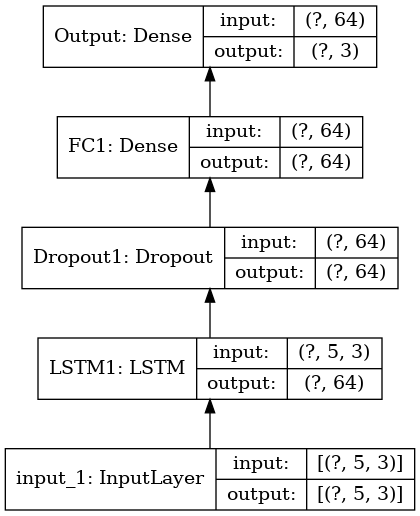

In [26]:
tf.keras.utils.plot_model(model, 'COVID-19_RNN.png', show_shapes=True, rankdir='BT')

In [27]:
# defining Root MSE as an evaluation metric:
def rmse(Y_pred, Y_true):
    return tf.sqrt(tf.reduce_mean(tf.square(Y_pred - Y_true)))

In [28]:
model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=[rmse, 'mse'])
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0441 - rmse: 0.1919 - mse: 0.0441
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0198 - rmse: 0.1358 - mse: 0.0198
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0162 - rmse: 0.1252 - mse: 0.0162
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1126 - mse: 0.0127
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1039 - mse: 0.0110


## Evaluating model performance
### Evaluation Metrics

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MSE** "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is more popular than MSE, because RMSE is interpretable in the "y" units.

In [29]:
df_test_norm = df_test.apply(lambda x: (x - X_train_min) / (X_train_max - X_train_min), axis=1)
df_test_norm.head()

,new_infections,new_deaths,new_recovered
156,1.000000,1.000000,0.498363
157,0.879843,0.428571,0.416515
158,0.927814,0.976190,0.781739
159,1.021218,0.976190,0.934522
160,1.169742,1.011905,0.823208


In [30]:
# Make predictions:
X_test_seq = df_test_norm[:sequence_length].values
Y_pred = np.zeros(df_test_norm.shape)
Y_pred[:sequence_length] = X_test_seq
for t in range(df_test_norm.shape[0] - sequence_length):
    y_pred = model.predict(np.expand_dims(X_test_seq, axis=0))
    Y_pred[t + sequence_length] = y_pred
    X_test_seq = Y_pred[t + 1:t + sequence_length + 1]

In [31]:
# Rescale and round predictions:
Y_test = df_test
Y_pred = np.round(Y_pred * (X_train_max - X_train_min) + X_train_min)

In [32]:
print(f"Test RMSE: {rmse(Y_pred, Y_test)}")

Test RMSE: 741.6178903169039


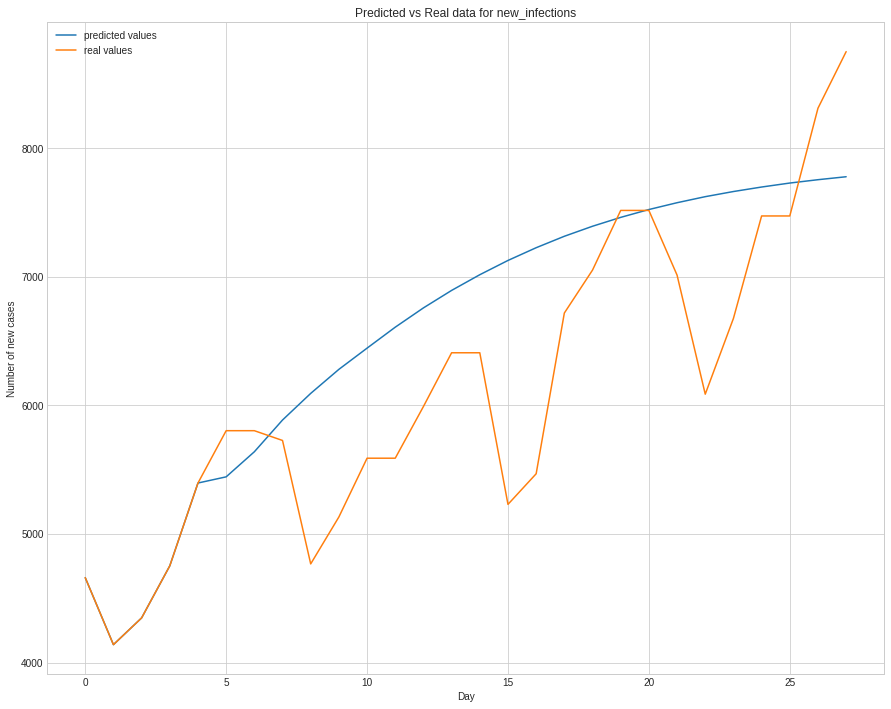

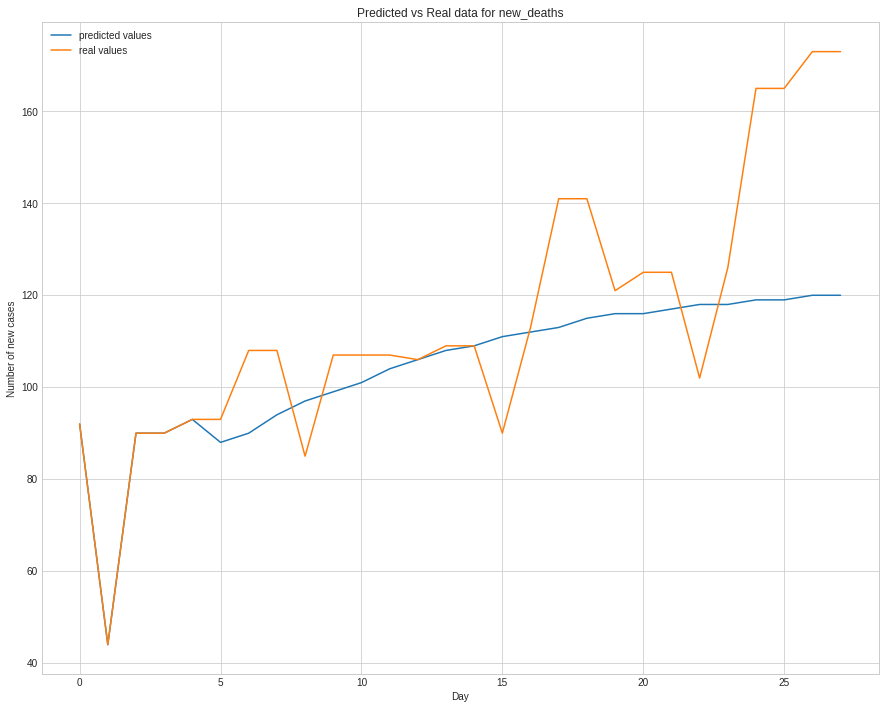

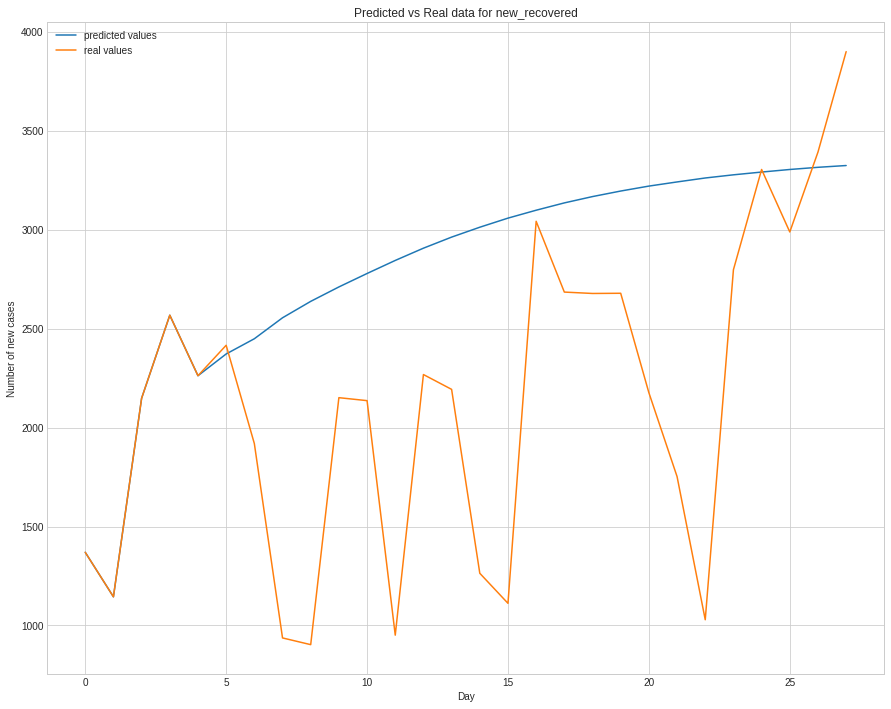

In [33]:
time = np.arange(df_test.shape[0])

for index, feature in enumerate(features):
    plt.figure(figsize=(15, 12))
    plt.plot(time, Y_pred[:, index])
    plt.plot(time, Y_test[feature])
    plt.xlabel("Day")
    plt.ylabel("Number of new cases")
    plt.legend(["predicted values", "real values"])
    plt.title(f"Predicted vs Real data for {feature}")
    plt.show()